In [31]:
import pandas as pd
import numpy as np
import scipy
import scipy.fft
import scipy.fftpack
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import lag_plot


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.rcParams["figure.figsize"] = (20,16)


In [14]:
d = pd.read_csv("flip2.csv")
d
#down = pd.read_csv("l10const.down")
#up = pd.read_csv("l10const.up")

gpio  delay  time
0        25     69    63
1        25     69    63
2        25     69    63
3        25     69    63
4        25     69    63
...     ...    ...   ...
99995    25     69    63
99996    25     69    63
99997    25     69    63
99998    25     69    63
99999    25     69    63

[100000 rows x 3 columns]

In [15]:
#d.rename(columns = {'time': 'down'}, inplace = True)

In [16]:
def low_bit(x):
    if x & 1:
        return 0
    if x & 2:
        return 1
    if x & 4:
        return 2
    if x & 8:
        return 3
    if x & 16:
        return 4
    if x & 32:
        return 5
    raise "nope"

In [17]:
d['down'] = d['time'].map(low_bit)

[]

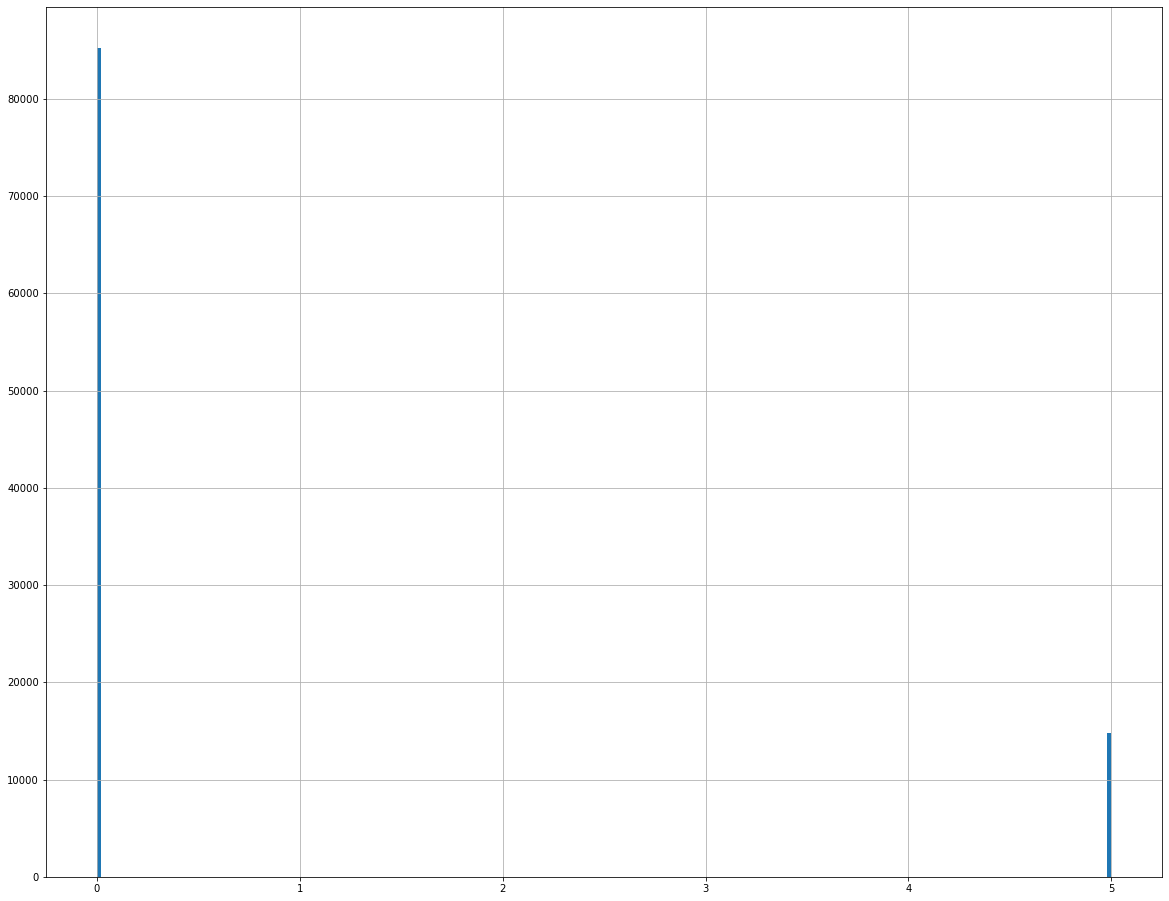

In [18]:
d = d[d['gpio'] == 25]
x = d['down']
x.hist(bins=256).plot()

In [19]:
plt.figure(figsize=(20,20))
lag_plot(d['down'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

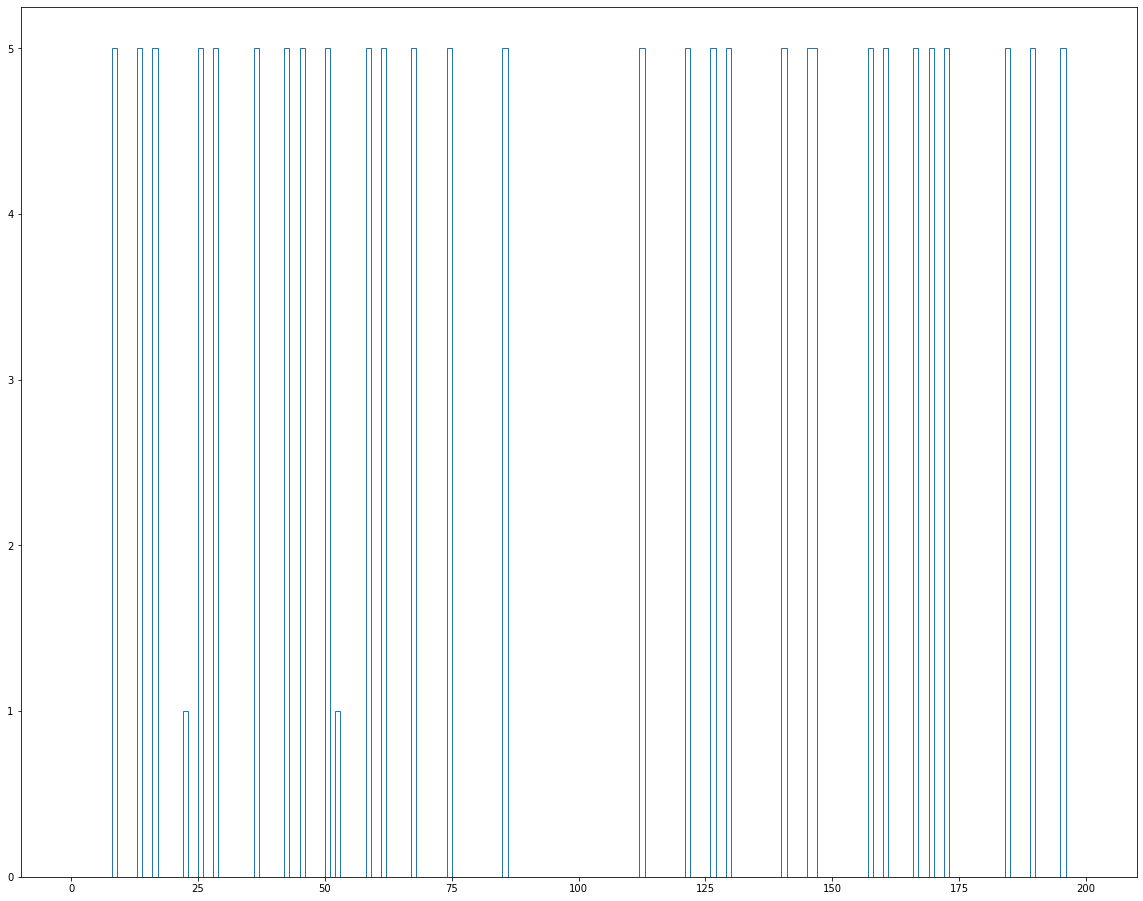

In [20]:
cut = d['down'][:200]


fig, ax = plt.subplots()
ax.stairs( cut)

plt.show()


#.plot(kind = 'step', figsize=(30,16))





In [21]:
def colourplot(data, size = 300):
    nx = size
    ny = size
    nm = data.name
    data = data[:nx*ny].values.reshape(nx, ny)

    plt.xlim(0, nx)
    plt.ylim(0, ny)

    plt.xlabel('samples')
    plt.ylabel('samples')
    plt.title(f'{nm}')

    #cax = plt.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
    cax = plt.imshow(data, interpolation='nearest', cmap=cm.afmhot)
    cbar = plt.colorbar(cax, ticks=[255, 127, 0])
    cbar.ax.set_yticklabels(['255', '127', '0'])

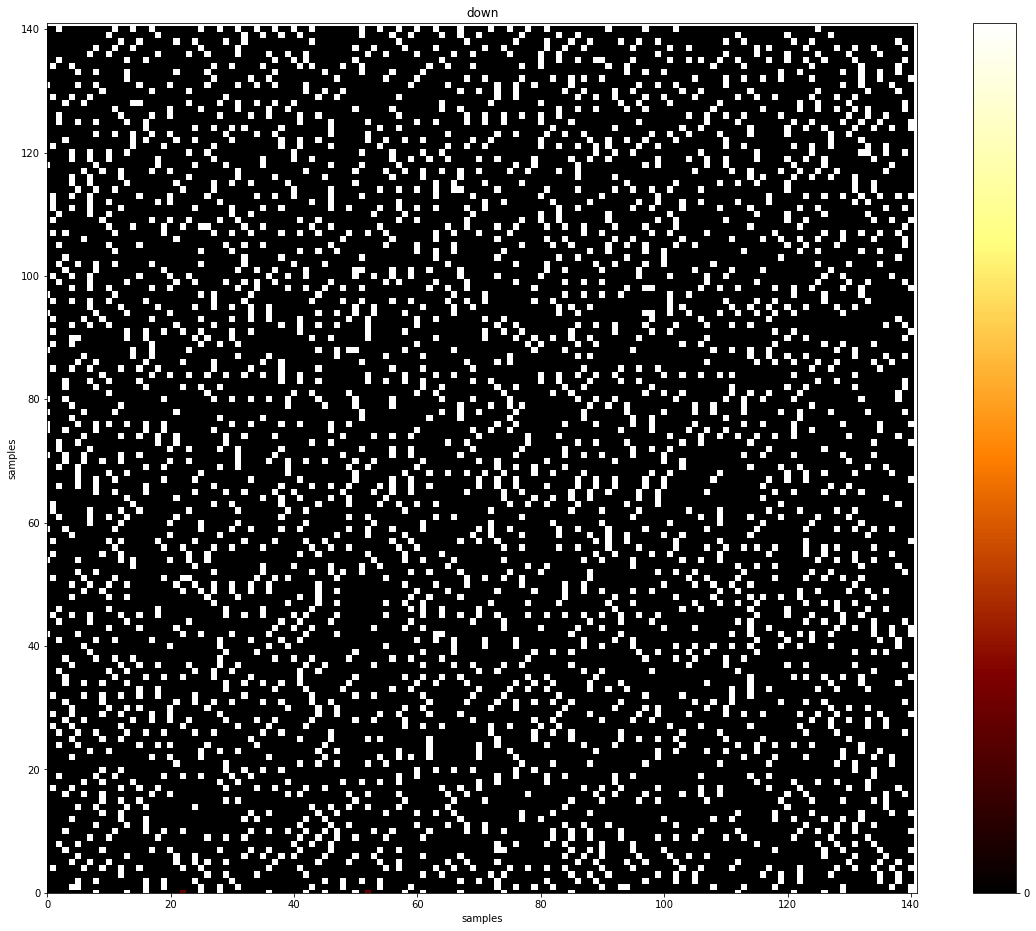

In [22]:
colourplot(d['down'][:141*141], 141)

In [40]:
y = scipy.fft.fft(d['down'])
x = scipy.fftpack.fftfreq(y.size, 1 / 8e3)
plt.plot(x[:x.size//2], abs(y)[:y.size//2])

In [36]:
y = scipy.fft.fft(d['down'])
plt.plot(abs(y))